# Plotting for Exploratory Data Analysis :

# Data Description :
The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

# Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import warnings 
from statsmodels import robust 
import warnings                                       #This sometimes does not seem to work so :
warnings.filterwarnings('ignore')

# from IPython.display import HTML
# HTML('''<script>
# code_show_err=false; 
# function code_toggle_err() {
#  if (code_show_err){
#  $('div.output_stderr').hide();                #This Script will be helpful in supressing the warnings in the notebook
#  } else {
#  $('div.output_stderr').show();
#  }
#  code_show_err = !code_show_err
# } 
# $( document ).ready(code_toggle_err);
# </script>
# To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [6]:
# # Plot color palette just to set the right kind of color scheme for our visualizarion :
# def plot_color_palette(palette: str):
#     figure = sns.palplot(sns.color_palette())
#     plt.xlabel("Color palette: " + palette)
#     plt.show(figure)

# palettes = ["deep", "muted", "pastel", "bright", "dark", "colorblind"]
# for palette in palettes:
#     sns.set(palette=palette)
#     plot_color_palette(palette)
# !pip install mplcyberpunk

In [10]:
# sns.set(palette='muted') #Set this according to your needs 
import mplcyberpunk
plt.style.use("cyberpunk")
mplcyberpunk.add_glow_effects()


### Loading the data from csv file :

In [11]:
HSD = pd.read_csv('../input/habermans-survival-data-set/haberman.csv', header=None, names=['age', 'year', 'nodes', 'status'])
HSD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


### Observations :
- number of datapoints = 306 per column.
- number of columns - 4.
- We have 3 features here that can 

In [12]:
HSD.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

### Observations :
- Here, It can be seen that the name of the columns corroborate with the attribute information provided with the dataset. 

In [13]:
HSD["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

### Observations :
- The number of people that survived the disease for 5 years or longer are 225 and the ones who died within 5 years are 81 in number. 


## objective : 
Our objective here is to analyse how features like age and the number of axillary nodes affect the survival of a cancer patient.

In [14]:
HSD.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Observations :
- above mentioned high level satistics are self explanatory as the result of each operation like count, mean, standard deviation is stated right next to it.

# 2D - scatter plot : 

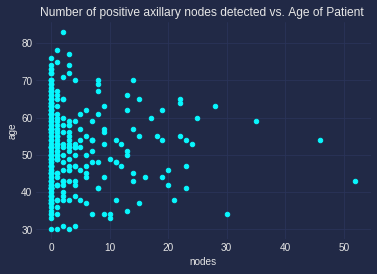

In [15]:
HSD.plot(kind = "scatter", x = 'nodes', y = 'age')
plt.title("Number of positive axillary nodes detected vs. Age of Patient ")
plt.show()
warnings.filterwarnings('ignore')

### Observations:
- There is not really much information that can be obtained from a 2-D scatterplot since the data points do not really support visualisation in a 2d space with scatterplot.

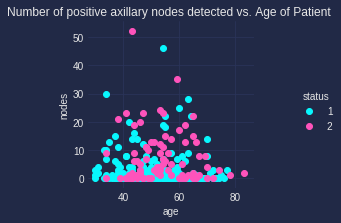

In [16]:

# sns.set_style("whitegrid")
sns.FacetGrid( HSD, hue = "status") \
    .map(plt.scatter, "age", "nodes")\
    .add_legend()
plt.title("Number of positive axillary nodes detected vs. Age of Patient ")
plt.show()




#  3D Scatter plot :

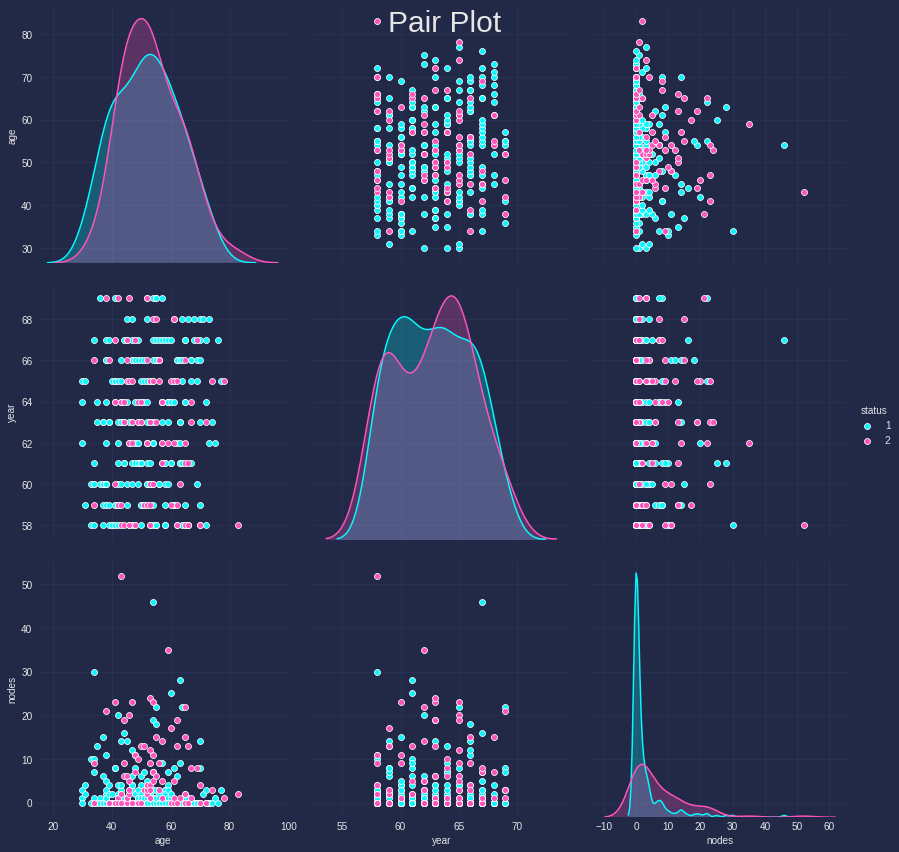

In [17]:
plt.close()
# sns.set_style("whitegrid")
# plt.suptitle("Pair plot")
g = sns.pairplot(HSD, vars = ["age", "year", "nodes"],  hue = "status", size = 4)
g.fig.suptitle("Pair Plot", fontsize=30)
# g.fig.show()
plt.show()

# Observations :
- Shown above is a pairplot of all possible combinations of the features keeping the "status" as hue. 
- "age" and "nodes are the most useful features in determining the survival status.
- plots shown in blue represent the patients that survived.
- plots shown in orange represent patients that died within 5 years of the treatment.
- there is not much seperation seen in the data points when plotted on pair plots.

# Mean, variance and  standard deviation :

In [18]:
survived = HSD[HSD["status"] == 1]
dead = HSD[HSD["status"] == 2]

print(survived["age"].describe())

count    225.000000
mean      52.017778
std       11.012154
min       30.000000
25%       43.000000
50%       52.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64


# Observations :
- Number of people that survived the disease is 225.
- average age of people that survived the test : 52.
- minimum age of people that survived the test : 30.
- maximum age of people that survived the test : 77.

In [19]:
print(dead["age"].describe())

count    81.000000
mean     53.679012
std      10.167137
min      34.000000
25%      46.000000
50%      53.000000
75%      61.000000
max      83.000000
Name: age, dtype: float64


# Observations :
- Number of people that did not survive the disease is 81.
- average age of people that did not  survive the test : 53.
- minimum age of people that did not survive the test : 34.
- maximum age of people that did not survive the test : 83.

# Medians, quantiles, percentiles, median absolute deviation :

In [20]:
print("Medians :")
print("Median age of the people that survived : ",np.median(survived["age"]))
print("Median age of the people that could not survive : ", np.median(dead["age"]))
print("Median Positive lymph nodes in the people that survived : ", np.median(survived["nodes"]))
print("Median Positive lymph nodes in the people that could not survive :  ", np.median(dead["nodes"]))
print("------------------------------------------------------------------------------------------------")
print("Quantiles :")
print("Survived : ")
print("AGE :",np.percentile(survived["age"], np.arange(0, 100, 25)))
print("NODES : ", np.percentile(survived["nodes"], np.arange(0,100,25)))
print("Dead : ")
print("AGE :",np.percentile(dead["age"], np.arange(0, 100, 25)))
print("NODES : ", np.percentile(dead["nodes"], np.arange(0,100,25)))
print("------------------------------------------------------------------------------------------------")
print("Percentiles : ")
print("Survived : ")
print("AGE :",np.percentile(survived["age"], 40))
print("NODES : ", np.percentile(survived["nodes"], 40))
print("dead : ")
print("AGE :",np.percentile(dead["age"], 40))
print("NODES : ", np.percentile(dead["nodes"], 40))
print("------------------------------------------------------------------------------------------------")
print("Median Abolute Deviation : ")
print("Survived :")
print("AGE :",robust.mad(survived["age"]))
print("NODES :",robust.mad(survived["nodes"]))
print("Dead :")
print("AGE :",robust.mad(dead["age"]))
print("NODES :",robust.mad(dead["nodes"]))


Medians :
Median age of the people that survived :  52.0
Median age of the people that could not survive :  53.0
Median Positive lymph nodes in the people that survived :  0.0
Median Positive lymph nodes in the people that could not survive :   4.0
------------------------------------------------------------------------------------------------
Quantiles :
Survived : 
AGE : [30. 43. 52. 60.]
NODES :  [0. 0. 0. 3.]
Dead : 
AGE : [34. 46. 53. 61.]
NODES :  [ 0.  1.  4. 11.]
------------------------------------------------------------------------------------------------
Percentiles : 
Survived : 
AGE : 49.0
NODES :  0.0
dead : 
AGE : 50.0
NODES :  3.0
------------------------------------------------------------------------------------------------
Median Abolute Deviation : 
Survived :
AGE : 13.343419966550417
NODES : 0.0
Dead :
AGE : 11.860817748044816
NODES : 5.930408874022408


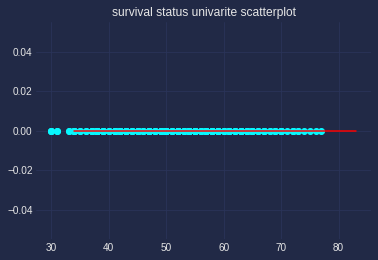

In [21]:
plt.plot(survived["age"], np.zeros_like(survived["age"]), 'o')
plt.title("survival status univarite scatterplot")
plt.plot(dead["age"], np.zeros_like(dead["age"]), 'r')
plt.show()

## Observations:
- it is quite difficult to make any firm obervations as the data points overlap each other almost entirely. 
- However, there does seems to be a little discernment post the age of 78(approx.) stating that the patients above the age of 78 could not survive the treatment.
- Also, people below the age of 32 were cured completely.

# Histograms :

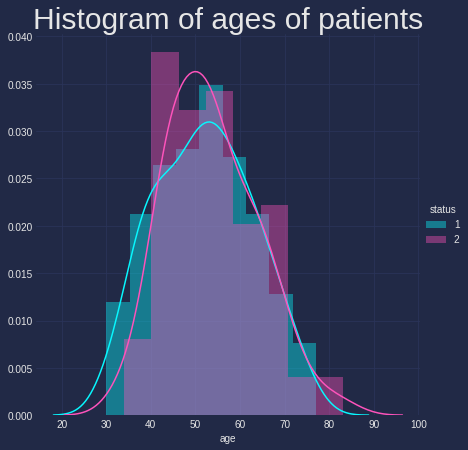

In [22]:
warnings.filterwarnings("ignore")
sns.FacetGrid(HSD, hue = "status", size = 6)\
    .map(sns.distplot, "age")\
    .add_legend()
plt.title('Histogram of ages of patients', fontsize=30)
plt.show()

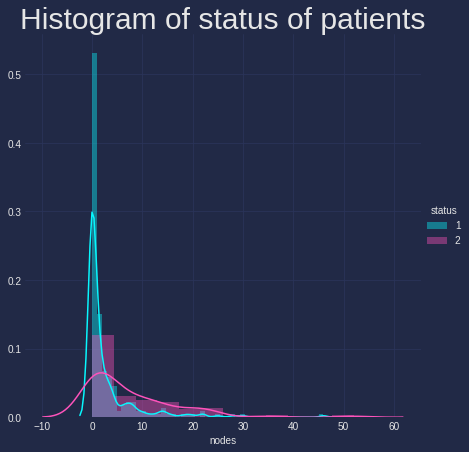

In [23]:
sns.FacetGrid(HSD, hue = "status", size = 6)\
    .map(sns.distplot, "nodes")\
    .add_legend()
plt.title('Histogram of status of patients', fontsize=30)
plt.show()

# PDFs and CDFs :

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ] 
 ##########################################################################################


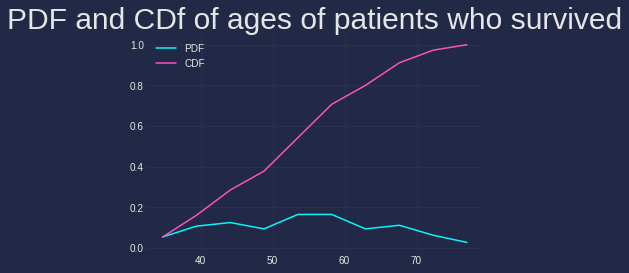

In [24]:
counts,bin_edges = np.histogram(survived["age"], bins = 10, density = True )
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges, "\n", "#"*90)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.gca().legend(('PDF','CDF'))
plt.title('PDF and CDf of ages of patients who survived', fontsize=30)
plt.show()



[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ] 
 ##########################################################################################


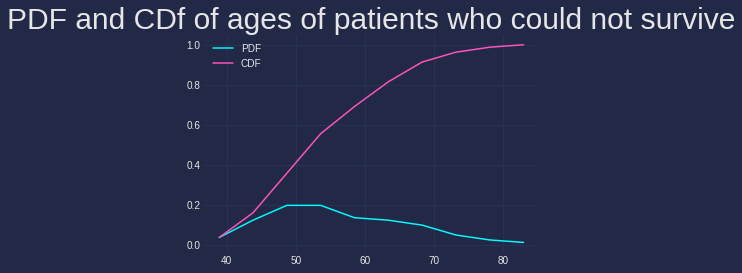

In [25]:
counts,bin_edges = np.histogram(dead["age"], bins = 10, density = True )
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges, "\n", "#"*90)
cdf = np.cumsum(pdf)
plt.title('PDF and CDf of ages of patients who could not survive', fontsize=30)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.gca().legend(('PDF','CDF'))
plt.show()



[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


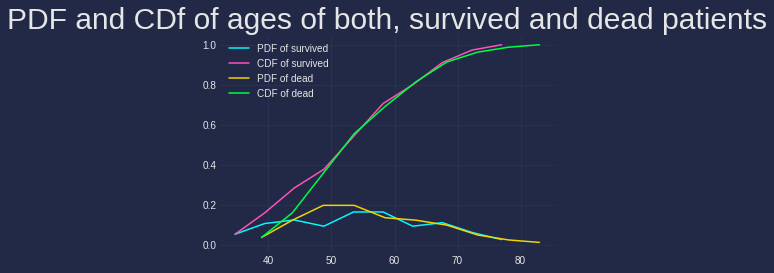

In [26]:
counts,bin_edges = np.histogram(survived["age"], bins = 10, density = True )
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts,bin_edges = np.histogram(dead["age"], bins = 10, density = True )
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.gca().legend(('PDF of survived','CDF of survived ', 'PDF of dead ', 'CDF of dead'))
plt.title('PDF and CDf of ages of both, survived and dead patients', fontsize=30)

plt.show()






## Observations :
- the pdf and cdf of the survived and dead patients seem to overlap a lot to make any significant observation.

# Violion Plot :

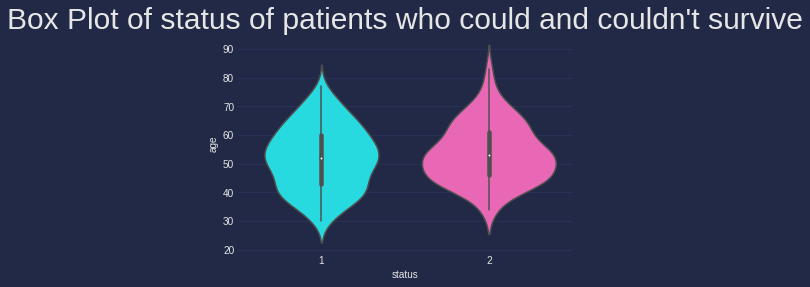

In [27]:
sns.violinplot(x = 'status', y = 'age', data = HSD)
plt.title("Box Plot of status of patients who could and couldn't survive", fontsize=30)
plt.show()

# Box & Whiskers Plot :

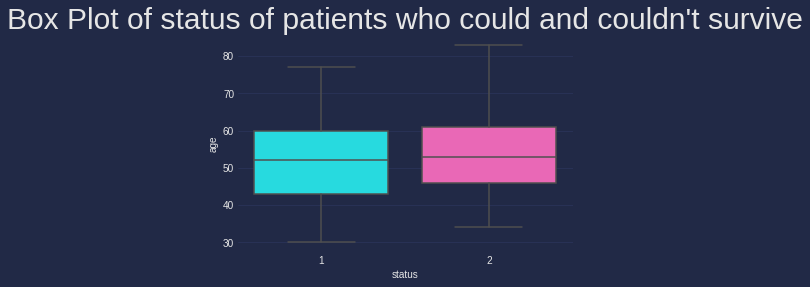

In [28]:
sns.boxplot(x = "status" , y = "age", data = HSD )
plt.title("Box Plot of status of patients who could and couldn't survive", fontsize=30)
plt.show()

# observations 
- it can be inferred from the plot that the people between the age from 30 to approx. 34 survived after the treatment.
- Also, people past the age of 73 were not able to survive. 

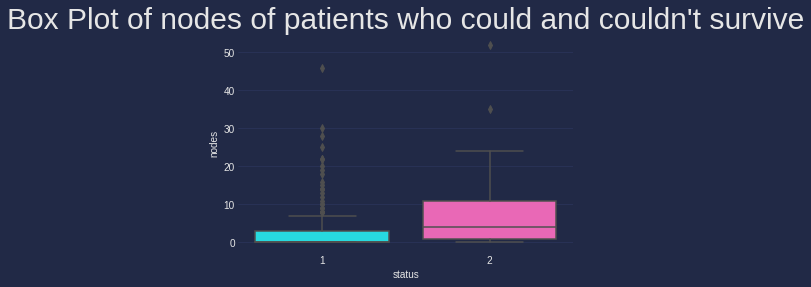

In [29]:
sns.boxplot(x = 'status', y = 'nodes', data = HSD)
plt.title("Box Plot of nodes of patients who could and couldn't survive", fontsize=30)
plt.show()

- no valuable interpretations can be drawn from a boxplot that has nodes as a feature as there are a lot of outlier data points related to the "nodes" feature. 
